                                         system:index      ndvi       date  \
0   20220319T092029_20220319T092026_T34TFK_102076,...  0.294465 2022-03-19   
17  20220319T092029_20220319T092026_T34TFK_102075,...  0.213115 2022-03-19   
15  20220319T092029_20220319T092026_T34TFK_102073,...  0.209885 2022-03-19   
14  20220319T092029_20220319T092026_T34TFK_102075,...  0.172811 2022-03-19   
13  20220319T092029_20220319T092026_T34TFK_102076,...  0.182788 2022-03-19   

         point_id                                               .geo  
0   102076,180124  {"geodesic":false,"type":"Point","coordinates"...  
17  102075,180133  {"geodesic":false,"type":"Point","coordinates"...  
15  102073,180133  {"geodesic":false,"type":"Point","coordinates"...  
14  102075,180132  {"geodesic":false,"type":"Point","coordinates"...  
13  102076,180130  {"geodesic":false,"type":"Point","coordinates"...  
               ndvi                           date
count  33367.000000                          33367
mea

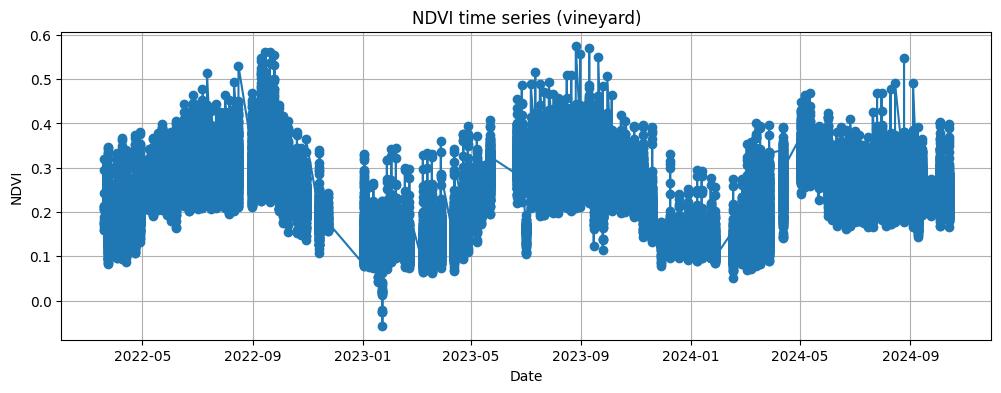

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/vineyard-ndvi-GV.csv")
df = df.rename(columns={"NDVI": "ndvi"})
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

print(df.head())
print(df.describe())

plt.figure(figsize=(12,4))
plt.plot(df["date"], df["ndvi"], marker="o")
plt.title("NDVI time series (vineyard)")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.grid(True)
plt.show()


In [2]:
df["month"] = df["date"].dt.month
df.groupby("month")["ndvi"].describe()


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,2297.0,0.129822,0.036664,-0.056755,0.107650,0.123070,0.145254,0.330878
2,1703.0,0.132879,0.035087,0.051493,0.108758,0.125503,0.149384,0.345213
3,2822.0,0.160589,0.058547,0.063170,0.115949,0.148170,0.192044,0.401002
4,2484.0,0.197994,0.056555,0.066543,0.157750,0.191470,0.230341,0.393939
5,3078.0,0.289118,0.047850,0.132524,0.254331,0.287655,0.321123,0.469615
6,3296.0,0.291802,0.046517,0.161180,0.260079,0.290969,0.321791,0.487195
7,5047.0,0.285875,0.047863,0.104124,0.256734,0.285893,0.315480,0.515718
8,4371.0,0.298199,0.049312,0.167987,0.265159,0.295961,0.327587,0.575650
9,3447.0,0.301629,0.065345,0.115365,0.256646,0.300162,0.337009,0.571429


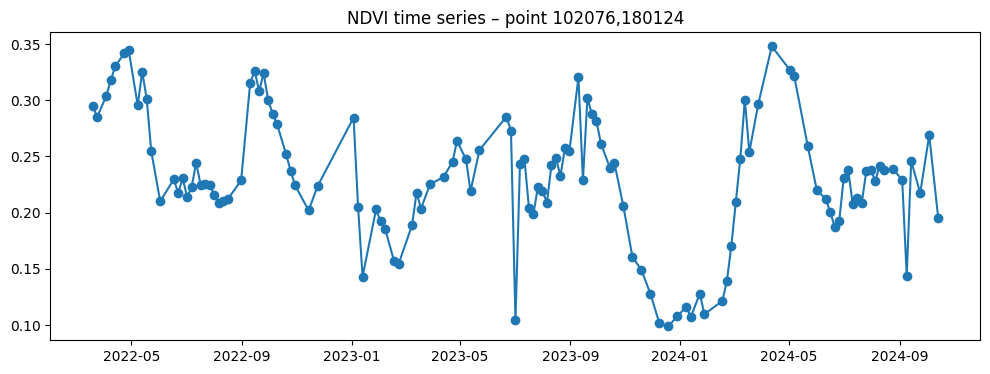

In [3]:
pid = df["point_id"].iloc[0]
g = df[df["point_id"] == pid].sort_values("date")

plt.figure(figsize=(12,4))
plt.plot(g["date"], g["ndvi"], marker="o")
plt.title(f"NDVI time series – point {pid}")
plt.show()


In [ ]:
daily = df.groupby("date")["ndvi"]
plt.figure(figsize=(12,4))
plt.plot(daily.mean(), label="mean")
plt.fill_between(
    daily.mean().index,
    daily.quantile(0.1),
    daily.quantile(0.9),
    alpha=0.3,
    label="10–90%"
)
plt.legend()
plt.title("NDVI envelope (vineyard)")
plt.show()
